# AutoEncoders for Denoising Images from the MINST Dataset

### AutoEnconders Practice with Tensorflow | Keras

_

**Práctica de Eliminación del ruido en imágenes del Dataset MNIST**

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
from tensorflow.keras.datasets import mnist

In [42]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

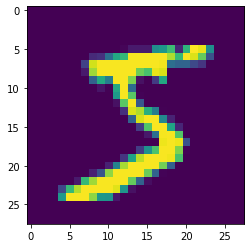

In [43]:
plt.imshow(X_train[0])

_

**some basic scaling**

In [44]:
X_train = X_train/255
X_test = X_test/255

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

### Basic AutoEncoder

In [46]:
X_train[0].shape

(28, 28)

In [86]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [87]:


decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28,28]))

In [88]:
autoencoder = Sequential([encoder, decoder])

In [89]:
autoencoder.compile(loss='binary_crossentropy',
                   optimizer=SGD(lr=1.5),
                   metrics=['accuracy'])

In [90]:
autoencoder.fit(X_train, X_train, epochs=5, validation_data=(X_test, X_test))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2906 - accuracy: 0.0698 - val_loss: 0.2169 - val_accuracy: 0.1272
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2063 - accuracy: 0.1377 - val_loss: 0.1753 - val_accuracy: 0.1722
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1718 - accuracy: 0.1800 - val_loss: 0.1575 - val_accuracy: 0.1944
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1518 - accuracy: 0.2060 - val_loss: 0.1455 - val_accuracy: 0.2142
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1438 - accuracy: 0.2184 - val_loss: 0.1395 - val_accuracy: 0.2167


#### We will grab a 10 images batch to 'predict' on them

In [55]:
passed_images = autoencoder.predict(X_test[:10])

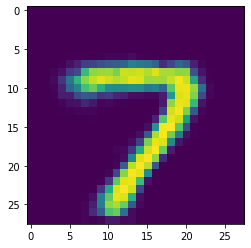

In [56]:
plt.imshow(result_images[0])

Original Image


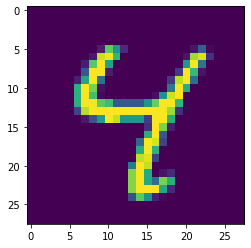

Image after Autoencoder


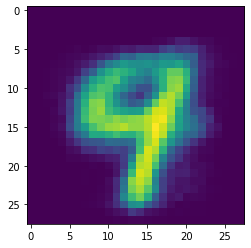

In [67]:
n = 6

print('Original Image')
plt.imshow(X_test[n])
plt.show()

print('Image after Autoencoder')
plt.imshow(result_images[n]);

### Noisey Images

**We will use the Gaussian Noise Layer to create noisey images**

In [68]:
from tensorflow.keras.layers import GaussianNoise

In [69]:
sample = GaussianNoise(0.2)

In [76]:
noisey = sample(X_test[0:10],training=True)

Original Image


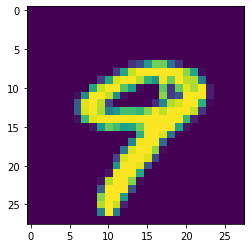

Noisey Version


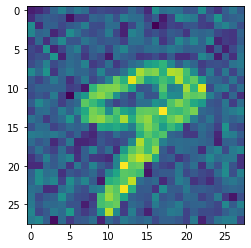

In [85]:
n = 9

print('Original Image')
plt.imshow(X_test[n])
plt.show()

print('Noisey Version')
plt.imshow(noisey[n])
plt.show()

### Denoiser Model

**Now we create a similar model but adding a noise layer to alter the images before encoding**

In [92]:
import tensorflow as tf

In [94]:
tf.random.set_seed(101)
np.random.seed(101)

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

encoder.add(GaussianNoise(0.2)) # Noise Layer 

encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [95]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28,28]))

In [96]:
noise_remover = Sequential([encoder, decoder])

In [97]:
noise_remover.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])

In [100]:
noise_remover.fit(X_train, X_train, epochs=8,
                           validation_data=(X_test, X_test))

Epoch 1/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1301 - accuracy: 0.2315 - val_loss: 0.1201 - val_accuracy: 0.2415
Epoch 2/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1213 - accuracy: 0.2435 - val_loss: 0.1162 - val_accuracy: 0.2499
Epoch 3/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1167 - accuracy: 0.2510 - val_loss: 0.1110 - val_accuracy: 0.2563
Epoch 4/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1124 - accuracy: 0.2587 - val_loss: 0.1073 - val_accuracy: 0.2658
Epoch 5/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1095 - accuracy: 0.2654 - val_loss: 0.1059 - val_accuracy: 0.2680
Epoch 6/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1076 - accuracy: 0.2686 - val_loss: 0.1033 - val_accuracy: 0.2747
Epoch 7/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1059 - accuracy: 0.2715 - val_loss: 0.1016 - val_accuracy: 0.27

In [101]:
ten_noisey_images = sample(X_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

The Original


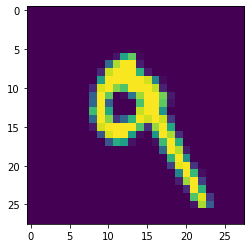

The Noisey Version


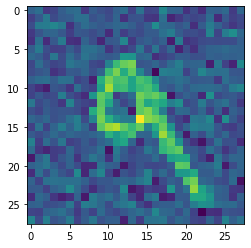

After going through denoiser


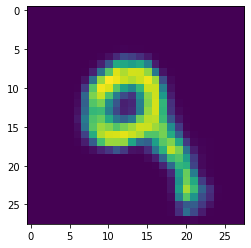

In [103]:
n = 7
print("The Original")
plt.imshow(X_test[n])
plt.show()
print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()
print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()